In [60]:
# pip install catboost

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from IPython.display import display
import datetime
import scipy.stats
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
trn = pd.read_csv('train.csv')
tst = pd.read_csv('test.csv')

In [3]:
# checkpoint 
train = trn.copy()
test = tst.copy()

In [4]:
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [5]:
train.shape

(900000, 33)

In [6]:
test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [7]:
test.shape

(700000, 32)

In [8]:
data = pd.concat([train,test])

In [9]:
data.info()
# test_info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 699999
Data columns (total 33 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   id      1600000 non-null  int64  
 1   f_00    1600000 non-null  float64
 2   f_01    1600000 non-null  float64
 3   f_02    1600000 non-null  float64
 4   f_03    1600000 non-null  float64
 5   f_04    1600000 non-null  float64
 6   f_05    1600000 non-null  float64
 7   f_06    1600000 non-null  float64
 8   f_07    1600000 non-null  int64  
 9   f_08    1600000 non-null  int64  
 10  f_09    1600000 non-null  int64  
 11  f_10    1600000 non-null  int64  
 12  f_11    1600000 non-null  int64  
 13  f_12    1600000 non-null  int64  
 14  f_13    1600000 non-null  int64  
 15  f_14    1600000 non-null  int64  
 16  f_15    1600000 non-null  int64  
 17  f_16    1600000 non-null  int64  
 18  f_17    1600000 non-null  int64  
 19  f_18    1600000 non-null  int64  
 20  f_19    1600000 non-null 

In [10]:
# check for data imbalance
print(f'{round(sum(data.target==1)/data.target.count()*100,3)} % is positive for target variable')

48.649 % is positive for target variable


In [11]:
# List the float, int and cat columns
flo = [col for col in data.columns if data[col].dtype == 'float64']
inte = [col for col in data.columns if data[col].dtype == 'int64']
cat = [col for col in data.columns if data[col].dtype == 'object']

print('float columns:', flo)
print('int columns:', inte)
print('cat columns:', cat)

float columns: ['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_28', 'target']
int columns: ['id', 'f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_29', 'f_30']
cat columns: ['f_27']


In [12]:
# List the unique values in each float column 
pd.Series({col: train[col].unique() for col in data[flo].columns})

f_00      [-1.3732464047725104, 1.6970205763459036, 1.68...
f_01      [0.2388873032099414, -1.7103224412821365, 0.61...
f_02      [-0.24337612703036202, -2.2303324519279237, -1...
f_03      [0.5674048947734351, -0.5456607755370599, 0.81...
f_04      [-0.6477146211280456, 1.1131725401245518, -0.6...
f_05      [0.8393264522690496, -1.5521747042227951, 0.11...
f_06      [0.1131328529032999, 0.4478252952236292, -0.70...
f_19      [0.2982180414431934, -3.1476670028255627, 2.82...
f_20      [-0.9197167887395312, -1.0754343248228595, -3....
f_21      [3.0585409468961715, 2.1790500380926945, -0.78...
f_22      [-2.5407388748740427, 2.2783149059699435, -1.3...
f_23      [0.7669520032525932, -0.6336582890691911, -0.5...
f_24      [-2.7306282330928697, -1.2170771231029698, -0....
f_25      [-0.2081774526126452, -3.782194149331882, 2.78...
f_26      [1.3634024035642385, -0.0583159446705583, -3.7...
f_28      [67.60915349123779, 377.09641521724336, -195.5...
target                                  

In [13]:
# List the unique values in each int column 
pd.Series({col: data[col].unique() for col in data[inte].columns})
# f_29, f_30 are cat columns 

id      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
f_07    [1, 3, 6, 2, 5, 4, 0, 7, 8, 9, 10, 11, 12, 13,...
f_08    [5, 3, 0, 2, 1, 7, 6, 4, 9, 8, 10, 11, 12, 13,...
f_09    [1, 4, 2, 0, 3, 5, 7, 6, 8, 9, 10, 11, 12, 13,...
f_10    [3, 0, 6, 4, 2, 7, 1, 5, 10, 8, 9, 11, 12, 13,...
f_11    [3, 2, 6, 1, 4, 5, 0, 9, 7, 8, 10, 12, 11, 13,...
f_12    [3, 4, 6, 0, 1, 2, 5, 7, 8, 9, 12, 10, 11, 13,...
f_13       [1, 0, 3, 4, 6, 5, 2, 8, 7, 10, 9, 11, 12, 13]
f_14       [6, 1, 2, 0, 3, 5, 4, 7, 8, 9, 11, 10, 14, 12]
f_15    [1, 0, 2, 3, 6, 4, 9, 5, 7, 8, 10, 14, 11, 12,...
f_16    [0, 4, 2, 3, 1, 5, 7, 6, 8, 9, 11, 10, 13, 12,...
f_17    [7, 6, 1, 0, 4, 3, 2, 5, 9, 8, 11, 12, 10, 14,...
f_18       [4, 0, 3, 2, 1, 6, 5, 7, 9, 8, 10, 11, 12, 13]
f_29                                               [0, 1]
f_30                                            [0, 2, 1]
dtype: object

In [14]:
# these fields should be categorical 
for col in ['f_29','f_30']: 
    data[col] = data[col].astype('object')

In [15]:
# List the unique values in each cat column 
pd.Series({col: data[col].unique() for col in data[cat].columns})

f_27    [ABABDADBAB, ACACCADCEB, AAAEABCKAD, BDBBAACBC...
dtype: object

In [16]:
data.describe(include="object").T

,count,unique,top,freq
f_27,1600000,1181880,BAAACABNBC,15
f_29,1600000,2,0,1046642
f_30,1600000,3,2,539266


### EDA

In [17]:
# Plot correlation matrix for visual of multicollinearity
# corrMatrix = train[flo + ['target']].corr()
# corrMatrix.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

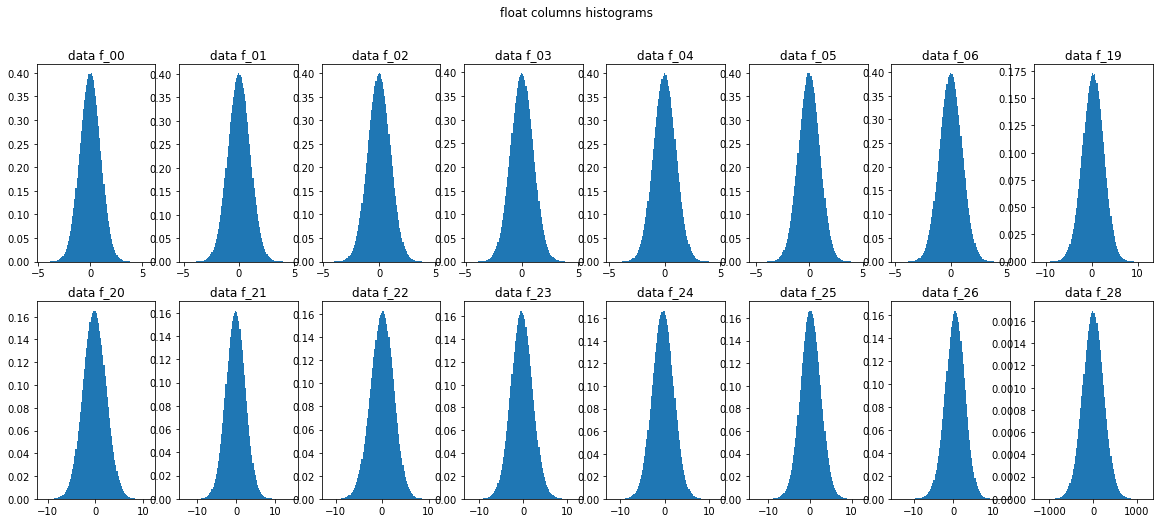

In [18]:
# float columns histograms
fig, axs = plt.subplots(2, 8, figsize=(20, 8))
for f, ax in zip(flo, axs.ravel()):
    ax.hist(data[f], density=True, bins=100)
    ax.set_title(f'data {f}')
plt.suptitle('float columns histograms')
plt.show()

# normally distributed

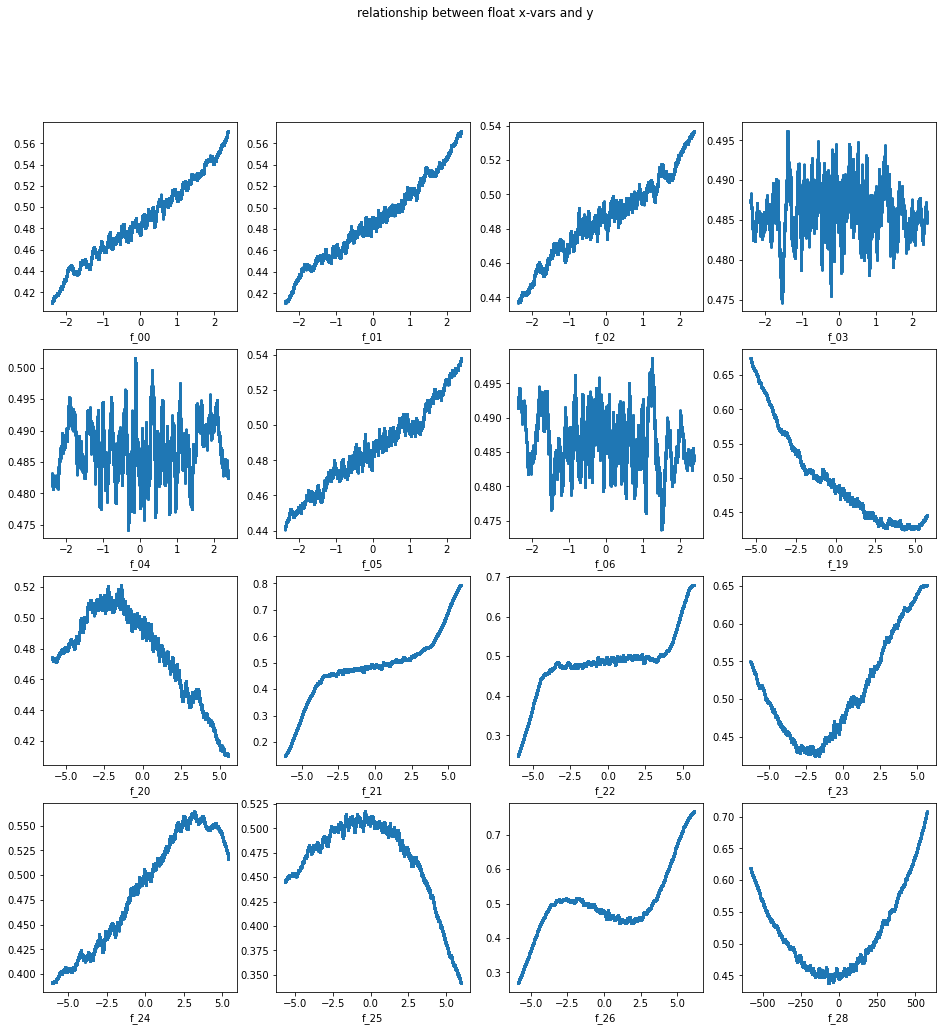

In [19]:
# relationship between float x-vars and y
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for f, ax in zip(flo, axs.ravel()):
    temp = pd.DataFrame({f: train[f].values,
                         'state': train.target.values})
    temp = temp.sort_values(f)
    temp.reset_index(inplace=True)
    ax.scatter(temp[f], temp.state.rolling(15000, center=True).mean(), s=2)
    ax.set_xlabel(f'{f}')
plt.suptitle('relationship between float x-vars and y')
plt.show()

In [20]:
print('shortest f_27 length:', data['f_27'].str.len().min()) 
print('longest f_27 length:', data['f_27'].str.len().max())

shortest f_27 length: 10
longest f_27 length: 10


In [21]:
for i in range(10):
    print(f'pos{i}')
    tg = data.groupby(data.f_27.str.get(i))
    temp = pd.DataFrame({'count': tg.size(), 'probability': tg.target.mean().round(2)})
    print(temp)
    print()

pos0
       count  probability
f_27                     
A     801905         0.54
B     798095         0.44

pos1
       count  probability
f_27                     
A     257145         0.58
B     435993         0.48
C     401666         0.49
D     265559         0.45
E     140231         0.43
F      63282         0.42
G      24323         0.41
H       8371         0.40
I       2443         0.40
J        737         0.38
K        192         0.39
L         41         0.28
M         11         0.67
N          5         1.00
O          1          NaN

pos2
        count  probability
f_27                      
A      529808         0.53
B     1070192         0.46

pos3
       count  probability
f_27                     
A     284998         0.57
B     421821         0.48
C     374183         0.48
D     255340         0.45
E     144944         0.43
F      70362         0.44
G      30402         0.45
H      11628         0.47
I       4244         0.48
J       1404         0.51
K        44

In [22]:
for i in range(10):
    data[f'pos{i}'] = data.f_27.str.get(i).apply(ord) - ord('A')
data["unique_characters"] = data.f_27.apply(lambda s: len(set(s)))
data.drop(['f_27'], axis = 1, inplace = True)
data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,unique_characters
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,1,0,1,3,0,3,1,0,1,3
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2,0,2,2,0,3,2,4,1,5
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,0,0,4,0,1,2,10,0,3,6
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,3,1,1,0,0,2,1,2,1,4
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,3,1,2,1,1,2,7,5,4,6


In [23]:
data.shape

(1600000, 43)

In [24]:
# All features 
data_num = list(data.select_dtypes(include = np.number).columns)
data_obj = list(data.select_dtypes(include = np.object).columns) 

In [25]:
dum = pd.get_dummies(data[data_obj], drop_first=True)

In [26]:
data_mod = pd.concat([data[data_num], dum], axis = 1)

In [27]:
data_mod.shape

(1600000, 44)

In [28]:
data_mod_train = data_mod[data_mod['target'].notnull()]
data_mod_test = data_mod[data_mod['target'].isnull()]

print(data_mod_train.shape)
print(data_mod_test.shape)

(900000, 44)
(700000, 44)


In [29]:
# take small sample for rapid testing 
data_mod_train = data_mod_train.groupby('target').apply(lambda x: x.sample(frac=0.1, random_state=100))

In [30]:
data_mod_train.shape

(90000, 44)

In [31]:
x = data_mod_train.drop(['id','target'], axis = 1)
y = data_mod_train['target']

In [32]:
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size = 0.3, random_state = 10)

In [33]:
print(f'{round(sum(y==1)/y.count()*100,3)} % is positive for target variable')

48.649 % is positive for target variable


### Model Building

In [34]:
# Result Collection List
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()
accuracy = list()

In [35]:
# Function for appending data into corresponding list
def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(x_test)
    y_pred=clf_model.predict(x_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    accuracy.append(accuracy_score(y_test,y_pred))
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

In [36]:
# 5-fold Cross validation object
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

### Logistic Regression

In [44]:
log_model=LogisticRegression(random_state=42)

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

# Create grid search using 10-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(x_train, y_train)
clf_LR.best_estimator_

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.007196856730011514, class_weight='balanced',
                   random_state=42)

In [46]:
test_eval(clf_LR, x_val, y_val, 'Logistic Regression', 'Actual')

Confusion Matrix
[[9348 4517]
 [3962 9173]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.70      0.67      0.69     13865
         1.0       0.67      0.70      0.68     13135

    accuracy                           0.69     27000
   macro avg       0.69      0.69      0.69     27000
weighted avg       0.69      0.69      0.69     27000
 

AUC-ROC
0.7515595694026539


### Decision Tree

In [48]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

In [49]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2, random_state=42)
clf_DT.fit(x_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   21.5s finished


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=50,
                       random_state=42)

In [50]:
test_eval(clf_DT, x_val, y_val, 'Decision Tree', 'Actual')

Confusion Matrix
[[10727  3138]
 [ 3620  9515]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76     13865
         1.0       0.75      0.72      0.74     13135

    accuracy                           0.75     27000
   macro avg       0.75      0.75      0.75     27000
weighted avg       0.75      0.75      0.75     27000
 

AUC-ROC
0.816636614062598


### Random Forest

In [51]:
rf_model = RandomForestClassifier(random_state=42)

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2, random_state=42)
clf_RF.fit(x_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomForestClassifier(max_depth=15, min_samples_split=20, random_state=42)

In [52]:
test_eval(clf_RF, x_val, y_val, 'Random Forest', 'Actual')

Confusion Matrix
[[12210  1655]
 [ 2379 10756]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86     13865
         1.0       0.87      0.82      0.84     13135

    accuracy                           0.85     27000
   macro avg       0.85      0.85      0.85     27000
weighted avg       0.85      0.85      0.85     27000
 

AUC-ROC
0.9239422123524864


### XGBoost

In [53]:
classifier_XGB = XGBClassifier(random_state=42)

params = {
        'min_child_weight': [1, 5, 10, 15],
        'gamma': [0.5, 1, 1.5, 2, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10]
        }

clf_XGB = RandomizedSearchCV(classifier_XGB, param_distributions=params, n_iter=20, scoring='roc_auc', 
                                   n_jobs=-1, cv=cv, verbose=2, random_state=42)
clf_XGB.fit(x_train, y_train)
clf_XGB.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.6min finished
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
test_eval(clf_XGB, x_val, y_val, 'XGBoost', 'Actual')

Confusion Matrix
[[12488  1377]
 [ 1526 11609]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90     13865
         1.0       0.89      0.88      0.89     13135

    accuracy                           0.89     27000
   macro avg       0.89      0.89      0.89     27000
weighted avg       0.89      0.89      0.89     27000
 

AUC-ROC
0.9558650733849202


### LightGBM

In [93]:
classifier_LGBM = LGBMClassifier(random_state=42)

params = {
        'n_estimators': [400, 700, 1000, 5000],
        'colsample_bytree': [0.7, 0.8, 1.0],
        'max_depth': [15,20,25],
        'num_leaves': [50, 100, 200, 500, 1000],
        'reg_alpha': [1.0, 1.1, 1.2],
        'reg_lambda': [1.0, 1.1, 1.2],
        'min_split_gain': [0.2, 0.3, 0.4],
        'subsample': [0.7, 0.8, 0.9],
        'subsample_freq': [20, 30, 40]
        }

clf_LGBM = RandomizedSearchCV(classifier_LGBM, param_distributions=params, n_iter=20, scoring='roc_auc', 
                                   n_jobs=-1, cv=cv, verbose=2, random_state=42)
clf_LGBM.fit(x_train, y_train)
clf_LGBM.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.1min finished


LGBMClassifier(colsample_bytree=0.8, max_depth=15, min_split_gain=0.2,
               n_estimators=5000, num_leaves=50, random_state=42, reg_alpha=1.0,
               reg_lambda=1.0, subsample=0.7, subsample_freq=20)

In [94]:
test_eval(clf_LGBM, x_val, y_val, 'LGBM', 'Actual')

Confusion Matrix
[[12782  1083]
 [ 1140 11995]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     13865
         1.0       0.92      0.91      0.92     13135

    accuracy                           0.92     27000
   macro avg       0.92      0.92      0.92     27000
weighted avg       0.92      0.92      0.92     27000
 

AUC-ROC
0.9733894804583487


### CatBoost

In [63]:
classifier_CBC = CatBoostClassifier(random_state=42)

params = {
    'depth' : [4,5,6,7,8,9, 10],
    'learning_rate' : [0.01,0.02,0.03,0.04],
    'iterations' : [10, 20,30,40,50,60,70,80,90, 100]}

clf_CBC = RandomizedSearchCV(classifier_CBC, param_distributions=params, n_iter=20, scoring='roc_auc', 
                                   n_jobs=-1, cv=cv, verbose=2, random_state=42)
clf_CBC.fit(x_train, y_train)
clf_CBC.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished


0:	learn: 0.6847211	total: 289ms	remaining: 14.1s
1:	learn: 0.6762790	total: 421ms	remaining: 10.1s
2:	learn: 0.6675927	total: 554ms	remaining: 8.68s
3:	learn: 0.6605327	total: 685ms	remaining: 7.88s
4:	learn: 0.6504437	total: 829ms	remaining: 7.46s
5:	learn: 0.6431064	total: 959ms	remaining: 7.03s
6:	learn: 0.6383279	total: 1.11s	remaining: 6.84s
7:	learn: 0.6324623	total: 1.26s	remaining: 6.6s
8:	learn: 0.6271291	total: 1.39s	remaining: 6.32s
9:	learn: 0.6209464	total: 1.51s	remaining: 6.03s
10:	learn: 0.6116453	total: 1.63s	remaining: 5.79s
11:	learn: 0.6041503	total: 1.76s	remaining: 5.59s
12:	learn: 0.5963754	total: 1.89s	remaining: 5.38s
13:	learn: 0.5899915	total: 2s	remaining: 5.15s
14:	learn: 0.5851331	total: 2.13s	remaining: 4.96s
15:	learn: 0.5811411	total: 2.29s	remaining: 4.86s
16:	learn: 0.5746510	total: 2.43s	remaining: 4.72s
17:	learn: 0.5684890	total: 2.56s	remaining: 4.55s
18:	learn: 0.5615610	total: 2.68s	remaining: 4.38s
19:	learn: 0.5581193	total: 2.78s	remaining: 

In [64]:
test_eval(clf_CBC, x_val, y_val, 'CatBoost', 'Actual')

Confusion Matrix
[[12241  1624]
 [ 2208 10927]] 

Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     13865
         1.0       0.87      0.83      0.85     13135

    accuracy                           0.86     27000
   macro avg       0.86      0.86      0.86     27000
weighted avg       0.86      0.86      0.86     27000
 

AUC-ROC
0.9278601380899701


### Champion Model

In [95]:
clf_LGBM.best_params_

{'subsample_freq': 20,
 'subsample': 0.7,
 'reg_lambda': 1.0,
 'reg_alpha': 1.0,
 'num_leaves': 50,
 'n_estimators': 5000,
 'min_split_gain': 0.2,
 'max_depth': 15,
 'colsample_bytree': 0.8}

In [96]:
classifier_LGBM = LGBMClassifier(subsample_freq=20,
                                 subsample=0.7, 
                                 reg_lambda=1.0, 
                                 reg_alpha=1.0,
                                 num_leaves=50,
                                 n_estimators=5000,
                                 min_split_gain=0.2,
                                 max_depth=15,
                                 colsample_bytree=0.8)

### Applying model on unseen data 

In [97]:
data_mod_test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,pos4,pos5,pos6,pos7,pos8,pos9,unique_characters,f_29_1,f_30_1,f_30_2
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,1,0,3,11,0,2,5,0,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,1,0,4,6,2,1,6,1,0,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,0,1,1,10,4,4,5,0,1,0
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,0,0,2,16,2,2,5,0,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,1,1,3,0,1,5,5,0,0,1


In [98]:
x_test = data_mod_test.copy()
x_test.drop(columns = ['id', 'target'], inplace = True)
x_test.shape

(700000, 42)

In [ ]:
classifier_LGBM.fit(x,y)
y_prob = classifier_LGBM.predict_proba(x_test)[:, 1]
y_prob = pd.DataFrame(y_prob, columns = ['target'])

In [ ]:
y_prob.shape

In [ ]:
ID = data_mod_test.loc[:,['id']]
ID['id'] = ID['id'].astype('object')

ID.shape

In [ ]:
df = pd.concat([ID, y_prob], axis = 1)
df = df[['id','target']]
df.head(20)

In [ ]:
df.to_csv("Result_LGBMClassifier.csv", index = False)